<a href="https://colab.research.google.com/github/KhuyenLE-maths/Medium_blogs/blob/main/CNN_MNIST/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
import os
os.chdir('/content/drive/MyDrive/Workshop/')

# import some library
import numpy as np
import matplotlib.pyplot as plt


## 1. Data preparation

In [7]:
from keras.datasets import mnist

(X_train_0, y_train_0), (X_test_0, y_test_0) = mnist.load_data()

print('X_train shape: ', X_train_0.shape)
print('y_train shape: ', y_train_0.shape)
print('X_test shape: ', X_test_0.shape)
print('y_test shape: ', y_test_0.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


## 2. Exploratory Data Analysis (EDA)

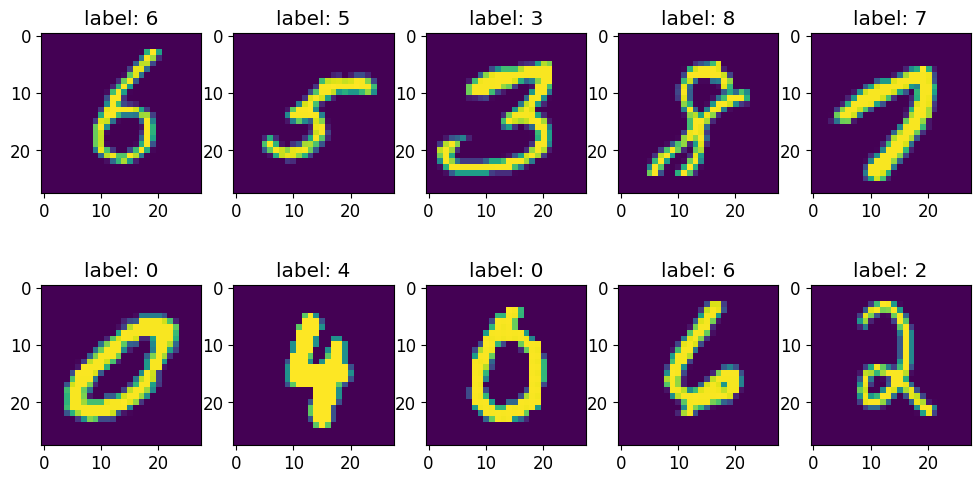

In [33]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize = (12, 6))

for i in range(10):
  ind = random.randint(0, len(X_train_0))
  plt.subplot(2, 5, i +1)
  plt.imshow(X_train_0[ind])
  plt.title('label: ' + str(y_train_0[ind]))

plt.show()

In [9]:
def count_labels(y, plot_ = None, title = None):
  unique_values, counts = np.unique(y, return_counts = True)
  value_counts = dict(zip(unique_values, counts))

  values = value_counts.keys()
  counts = value_counts.values()

  if plot_:
    X = [0,1,2,3,4,5,6,7,8,9]
    plt.bar(X,counts, color= ['black', 'red', 'green', 'magenta', 'cyan', 'yellow',
                              'pink', 'green', 'gray','blue'])
    for i in range(10):
      plt.text(i, list(counts)[i]+20, str(list(counts)[i]), ha = 'center', fontsize = 10)
    plt.title(title)
    plt.show()

  return values, counts

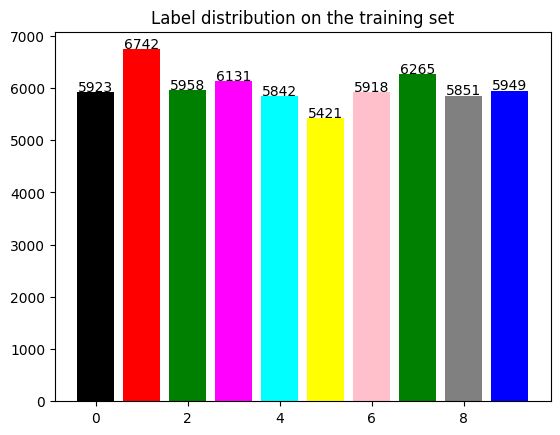

(dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 dict_values([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [10]:
count_labels(y_train_0, plot_ = True, title = 'Label distribution on the training set')

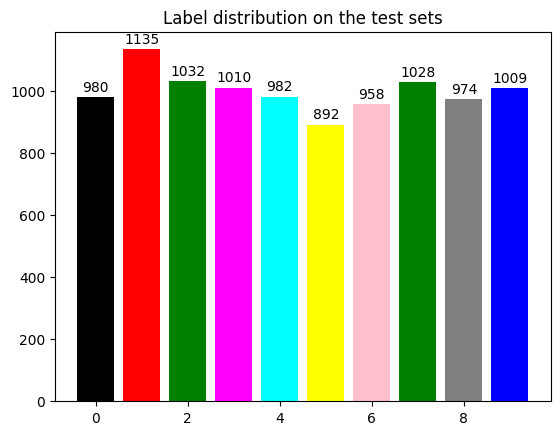

(dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 dict_values([980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]))

In [11]:
count_labels(y_test_0, plot_ = True, title = 'Label distribution on the test sets')

## 3. Data preprocessing
- Reshape into the required size of Keras
- Convert image values into float type
- Normalize images in range [0, 1]
- One-hot encoding the labels


In [12]:
from keras.utils import to_categorical
def data_preprocessing(X_train, y_train, X_test, y_test):
  # Step 1: Resize images
  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  # Step 2: Conver images into float types
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # Step 3: Normalization
  X_train = X_train/255.
  X_tets = X_test/255.

  # Step 4: One-hot encoding the labels
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [13]:
X_train_1, y_train_1, X_test_1, y_test_1 = data_preprocessing(X_train_0, y_train_0, X_test_0, y_test_0)

## 4. Build CNN model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD # stochastic gradient descent algorithm

def define_model():
  model = Sequential()

  # Block 1
  model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same',
                   activation = 'relu', input_shape = (28,28,1)))
  model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same',
                   activation = 'relu'))
  model.add(MaxPooling2D())

  # Block 2
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',
                   activation = 'relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',
                   activation = 'relu'))
  model.add(MaxPooling2D())

  # Fully connectec layers
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))

  # The output layer consists of 10 neurons which present the predicted
  # probabilities of the input image belonging to different classes (0-9)

  model.add(Dense(10, activation = 'softmax'))

  #Compile the model (with the loss function, optimization method and metrics)
  opt = SGD(learning_rate = 0.01)

  model.compile(opt,
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  return model

In [15]:
model = define_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

## 5. Training the model

In [17]:
from sklearn.model_selection import train_test_split
# hyperparameters
epochs = 20
batch_size = 128
# Train/val splitting
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_1, y_train_1,
                                                          test_size = 0.2,
                                                          random_state = 0)
model = define_model()
history = model.fit(X_train_2, y_train_2, epochs = 20, batch_size = batch_size,
                    steps_per_epoch= X_train_2.shape[0]//batch_size,
                    validation_data = (X_val_2, y_val_2),
                    validation_steps = X_val_2.shape[0]//batch_size, verbose=1)





Epoch 1/20
375/375 [==============================] - 15s 9ms/step - loss: 1.3150 - accuracy: 0.5991 - val_loss: 0.3486 - val_accuracy: 0.8849
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2568 - accuracy: 0.9235 - val_loss: 0.1676 - val_accuracy: 0.9496
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1581 - accuracy: 0.9526 - val_loss: 0.1166 - val_accuracy: 0.9638
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1170 - accuracy: 0.9650 - val_loss: 0.0935 - val_accuracy: 0.9705
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0943 - accuracy: 0.9717 - val_loss: 0.0913 - val_accuracy: 0.9727
Epoch 6/20
375/375 [==============================] - 4s 9ms/step - loss: 0.0795 - accuracy: 0.9758 - val_loss: 0.0696 - val_accuracy: 0.9785
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0695 - accuracy: 0.9786 - val_loss: 0.0631 - val_accuracy: 0.9798
Ep

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

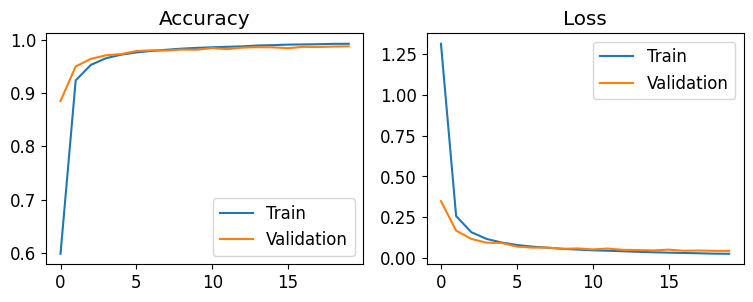

In [19]:
plt.rcParams.update({'font.size':12})
plt.figure(figsize = (9, 3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

## 6. Evaluate the model on the test set

In [20]:
y_test_pred = model.predict(X_test_1)
y_test = np.argmax(y_test_1, axis = 1)
y_pred = np.argmax(y_test_pred, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [21]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

print('Accuracy score: ', np.round(accuracy_score(y_test, y_pred)*100, 2))
print('Balanced accuracy score: ',np.round(balanced_accuracy_score(y_test,y_pred)*100, 2))

Accuracy score:  98.85
Balanced accuracy score:  98.84


Text(91.72222222222221, 0.5, 'True classes')

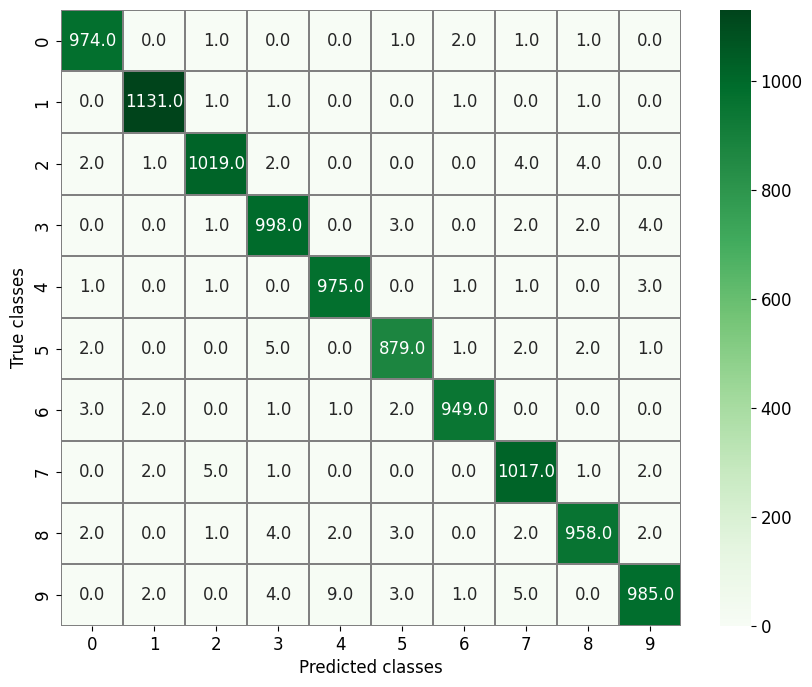

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
C = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(C, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray',
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes')
plt.ylabel('True classes')

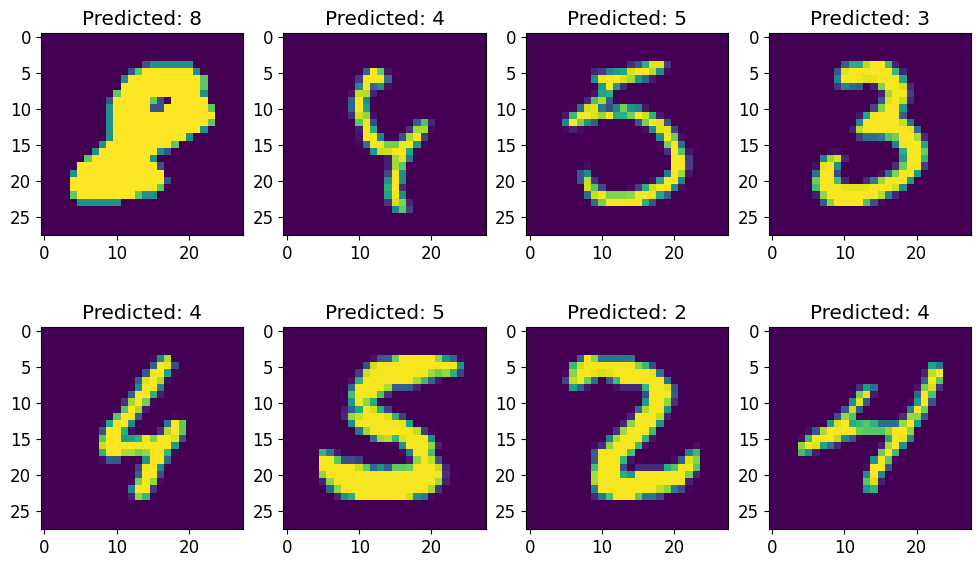

In [35]:
# Visualize some images in the test set and their predicted labels
cates = np.arange(10)
plt.figure(figsize = (12, 7))

for i in range(8):
  ind = random.randint(0, len(X_test_1))
  img = X_test_1[ind]
  plt.subplot(2, 4, i+1)
  plt.imshow(img)
  plt.title('Predicted: ' + str(y_pred[ind]))

plt.show()
